<a href="https://colab.research.google.com/github/Jacofeldman/Metodos1_JacoboFeldman/blob/main/Parcial3/Estimaci%C3%B3n_de_la_temperatura_de_un_gas_diat%C3%B3mico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

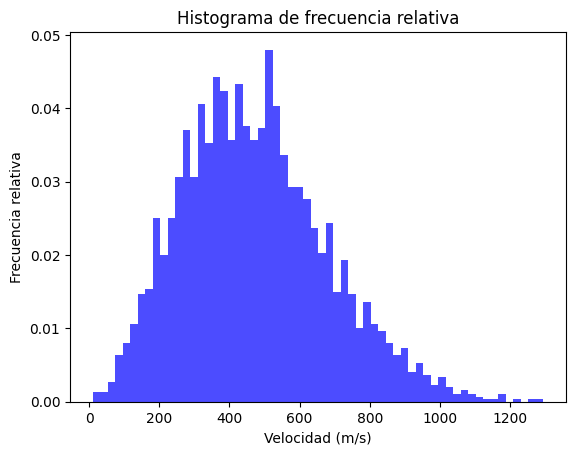

Velocidad promedio empírica: 472.15 m/s
Temperatura óptima encontrada: 297.89 K


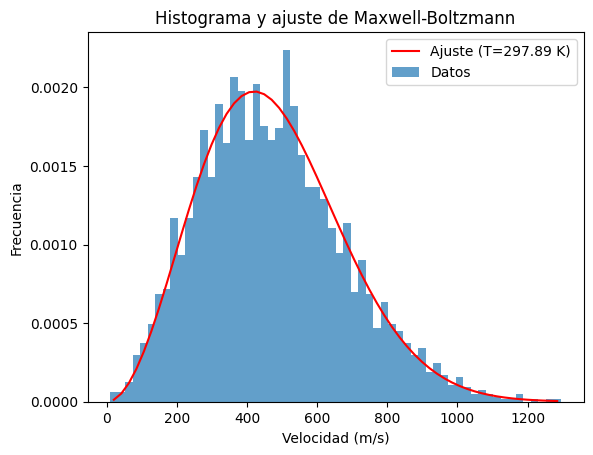

Velocidad más probable: 420.50 m/s
Velocidad promedio: 474.48 m/s
Diferencia entre velocidad promedio empírica y teórica: 2.33 m/s
Velocidad cuadrática media: 515.01 m/s
Estimación de T: 298.48 K
Error estándar: 4.52 K


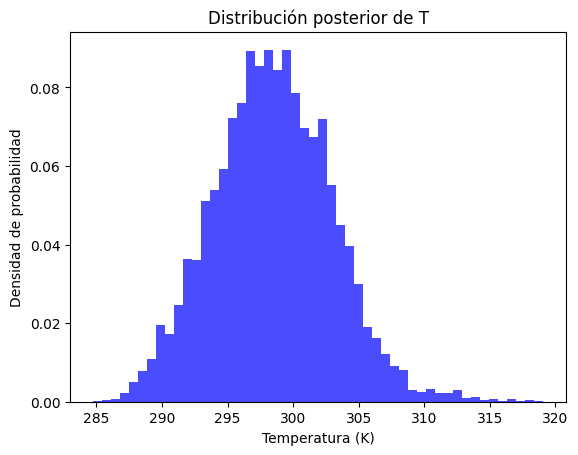

La hipótesis de que T > 305.60 K NO puede ser rechazada con un nivel de confianza del 95%.


False

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import random
# URL del archivo
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Maxwell.csv'

# Cargar datos
data = pd.read_csv(url)

# Extraer columna de velocidades
velocities = data['Velocidad']

# Crear histograma
bins = 60
hist, bin_edges = np.histogram(velocities, bins=bins, density=True)
bin_width = bin_edges[1] - bin_edges[0]
relative_freq = hist * bin_width  # Normalizar para frecuencia relativa

# Graficar histograma
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
plt.bar(bin_centers, relative_freq, width=bin_width, alpha=0.7, color='blue')
plt.title('Histograma de frecuencia relativa')
plt.xlabel('Velocidad (m/s)')
plt.ylabel('Frecuencia relativa')
plt.show()

# Calcular promedio empírico
average_velocity = np.sum(bin_centers * relative_freq)
print(f"Velocidad promedio empírica: {average_velocity:.2f} m/s")
# Constantes
R = 8.31  # Constante de los gases (J/mol·K)
m = 0.028  # Masa molar del nitrógeno (kg/mol)
k_B = R  # Para este caso

# Función de densidad de probabilidad Maxwell-Boltzmann
def maxwell_boltzmann_pdf(v, T):
    coef = (m / (2 * np.pi * k_B * T))**(3/2)
    return coef * 4 * np.pi * v**2 * np.exp(-m * v**2 / (2 * k_B * T))

# Log-Likelihood
def log_likelihood(T):
    f_values = maxwell_boltzmann_pdf(velocities, T)
    return -np.sum(np.log(f_values))

# Optimización
result = minimize(log_likelihood, x0=300, bounds=[(1, 1000)])
optimal_T = result.x[0]
print(f"Temperatura óptima encontrada: {optimal_T:.2f} K")

# Histograma y ajuste
bins = 60
hist, bin_edges = np.histogram(velocities, bins=bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Gráfica
plt.bar(bin_centers, hist, width=bin_edges[1]-bin_edges[0], alpha=0.7, label="Datos")
plt.plot(bin_centers, maxwell_boltzmann_pdf(bin_centers, optimal_T), color='red', label=f"Ajuste (T={optimal_T:.2f} K)")
plt.title("Histograma y ajuste de Maxwell-Boltzmann")
plt.xlabel("Velocidad (m/s)")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()
v_p = np.sqrt(2 * R * optimal_T / m)
print(f"Velocidad más probable: {v_p:.2f} m/s")
v_m = 2 / np.sqrt(np.pi) * v_p
print(f"Velocidad promedio: {v_m:.2f} m/s")
# Diferencia
difference = abs(average_velocity - v_m)
print(f"Diferencia entre velocidad promedio empírica y teórica: {difference:.2f} m/s")
# Velocidad cuadrática media
v_rms = np.sqrt(3 * R * optimal_T / m)
print(f"Velocidad cuadrática media: {v_rms:.2f} m/s")
# Algoritmo de Metropolis-Hastings
def metropolis_hastings(log_likelihood, T0, n_steps, step_size):
    samples = [T0]
    current_T = T0
    current_ll = -log_likelihood(current_T)

    for _ in range(n_steps):
        proposed_T = current_T + random.uniform(-step_size, step_size)

        # Evitar valores fuera del rango permitido
        if proposed_T <= 0:
            continue

        proposed_ll = -log_likelihood(proposed_T)
        acceptance_ratio = np.exp(proposed_ll - current_ll)

        if random.random() < acceptance_ratio:
            current_T = proposed_T
            current_ll = proposed_ll

        samples.append(current_T)

    return np.array(samples)

# Parámetros iniciales
initial_T = 300  # Suposición inicial
n_steps = 10000
step_size = 2

# Ejecutar el algoritmo
samples = metropolis_hastings(log_likelihood, initial_T, n_steps, step_size)

# Calcular el promedio y el error estándar
posterior_mean = np.mean(samples)
posterior_std = np.std(samples)

print(f"Estimación de T: {posterior_mean:.2f} K")
print(f"Error estándar: {posterior_std:.2f} K")

# Graficar la distribución posterior
plt.hist(samples, bins=50, density=True, alpha=0.7, color='blue')
plt.title("Distribución posterior de T")
plt.xlabel("Temperatura (K)")
plt.ylabel("Densidad de probabilidad")
plt.show()
# Definir función para evaluar hipótesis alternativa
def evaluar_hipotesis(samples, T_est, confianza=0.95):
    # Calcular límite superior del intervalo de confianza
    T_up = np.percentile(samples, 100 * confianza)

    # Evaluar hipótesis
    if T_up > T_est:
        print(f"La hipótesis de que T > {T_est:.2f} K NO puede ser rechazada con un nivel de confianza del {int(confianza*100)}%.")
        return False
    else:
        print(f"La hipótesis de que T > {T_est:.2f} K es rechazada con un nivel de confianza del {int(confianza*100)}%.")
        return True

# Valor estimado de temperatura para evaluar
T_est = 305.6  # Temperatura límite hipotética

# Evaluar hipótesis utilizando las muestras del algoritmo de Metropolis-Hastings
evaluar_hipotesis(samples, T_est)


Si los datos experimentales se obtienen bajo condiciones ideales, el promedio empírico debería coincidir con el valor teórico. Las diferencias pueden surgir de errores experimentales o sesgos en la muestra.